# Preprocessing of data

In this notebook the [terrorist data](https://linqs.soe.ucsc.edu/data) describing the relationship between terrorists is preprocessed before running it through the deep learning models to conduct experiments.

Following steps is preformed:
* Concatenating of nodes describing family, colleague, congregate and contact relationships.
* Removing rows that describe the inverse relationsship. Eg. non-family.
* A quick look at the desribution of labels and features.
* Exporting the preprocessed data.

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.expand_frame_repr', False)

### Concatenating of nodes describing family, colleague, congregate and contact relationships

Opening the files.

In [3]:
family = pd.read_csv('data/TerroristRel/TerroristRel_Family.nodes', header = None, delim_whitespace = True, engine='python')
colleague = pd.read_csv('data/TerroristRel/TerroristRel_Colleague.nodes', header = None, delim_whitespace = True, engine='python')
congregate = pd.read_csv('data/TerroristRel/TerroristRel_Congregate.nodes', header = None, delim_whitespace = True, engine='python')
contact = pd.read_csv('data/TerroristRel/TerroristRel_Contact.nodes', header = None, delim_whitespace = True, engine='python')

Concatenating the csv files together in a new dataframe.

In [4]:
new_df = pd.concat([family, colleague, congregate, contact], ignore_index=True)

In [5]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225
0,http://profilesinterror.mindswap.org/document/...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,family
1,http://profilesinterror.mindswap.org/document/...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,family
2,http://profilesinterror.mindswap.org/document/...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,family
3,http://profilesinterror.mindswap.org/document/...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,family
4,http://profilesinterror.mindswap.org/document/...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,family


### Removing rows that describe the inverse relationsship. Eg. non-family.

Taking a look at the last column to containing the labels 

In [6]:
new_df.iloc[:,-1].value_counts()

non-congregate    745
non-family        715
non-contact       703
colleague         461
non-colleague     390
contact           148
family            136
congregate        106
Name: 1225, dtype: int64

As we can see some of the columns describe the inverse relationship. This is not needed for our classification task and is therefore dropped.

In [7]:
# let't try to remove all the non-stuff because it does not make sense to us..
new_df = new_df[new_df[1225] != 'non-congregate']
new_df = new_df[new_df[1225] != 'non-family']
new_df = new_df[new_df[1225] != 'non-contact']
new_df = new_df[new_df[1225] != 'non-colleague']
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225
0,http://profilesinterror.mindswap.org/document/...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,family
1,http://profilesinterror.mindswap.org/document/...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,family
2,http://profilesinterror.mindswap.org/document/...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,family
3,http://profilesinterror.mindswap.org/document/...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,family
4,http://profilesinterror.mindswap.org/document/...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,family


### A quick look at the desribution of labels and features.

Let's take a quick look at the labels we have left.

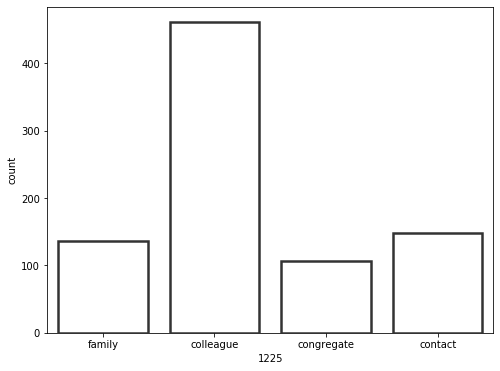

In [8]:
plt.subplots(figsize=(8, 6))
sns.countplot(x=1225, data=new_df, linewidth=2.5, facecolor=(1, 1, 1, 0), edgecolor=".2")

We can see that the colleague label is more frequent that the other labels. This will proberly give us an bias towards predicting the colleague relationship. Again, for the sake of the experiment of comparing Neural Graph Learning and a base model, it is not relevant to adjust the sizes of the classes, as it would give us a relative preformance difference. 

Let's also take a quick look at what the features distribution looks like in the dataset.
Features that are present are counted, moved to a dataframe and plottet.

In [9]:
# getting nr of non zeroes in each column 
# https://stackoverflow.com/questions/26053849/counting-non-zero-values-in-each-column-of-a-dataframe-in-python/34156147
feature_series = new_df.astype(bool).sum(axis=0)

In [10]:
feature_df = pd.DataFrame(feature_series).reset_index()
feature_df.columns = ['feature', 'count']

Text(0.5, 0, 'feature')

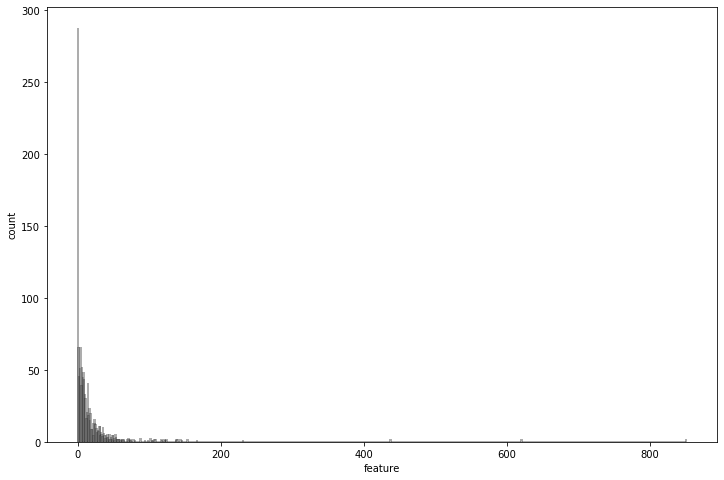

In [11]:
plt.rcParams["patch.force_edgecolor"] = True
plt.subplots(figsize=(12, 8))
sns.distplot(feature_df['count'], bins=1225, kde=False, color='w', hist_kws=dict(edgecolor="0.2", linewidth=2))
plt.ylabel("count")
plt.xlabel("feature")

It is obvious that there are are some of the features that are more present than others. The distribution plot shows that features form 0-100 is present often, while other features are present very little.

### Exporting the preprocessed data.

We make sure that the data is shuffeled before exporting the dataframe as a tsv file.

In [12]:
# make sure that the data is shuffeled
new_df = new_df.sample(frac=1)

In [13]:
new_df.to_csv('data/CustomTerroristRel/collected.nodes', sep="\t", header = False,index=False)